<a href="https://colab.research.google.com/github/Priyanshu-4096/21BDS0083_EDA/blob/main/21BDS0083_eda_mod6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/Priyanshu-4096/21BDS0083_EDA

#Name - Priyanshu Joarder
#Reg no - 21BDS0083
#Course Title - Exploratory Data Analysis
#Course Code - BCSE331L

Data Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the dataset
df = pd.read_csv('SuicideChina.csv')

# Data deduplication
print("Duplicate rows before deduplication:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicate rows after deduplication:", df.duplicated().sum())

# Replacing values
df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)
df['Urban'] = df['Urban'].replace('yes', 1).replace('no', 0)

# Discretization and binning
df['Age_group'] = pd.cut(df['Age'], bins=[-1, 20, 40, 60, 80, 100], labels=['0-19', '20-39', '40-59', '60-79', '80+'])

# Handling missing data
print("\nMissing values per column:")
print(df.isnull().sum())

# Traditional method - Mean imputation
imputer = SimpleImputer(strategy='mean')
df[['Age']] = imputer.fit_transform(df[['Age']])

# Maximum Likelihood Estimation (MLE) imputation (for comparison)
imputer_mle = IterativeImputer(max_iter=10, random_state=42)
df[['Age']] = imputer_mle.fit_transform(df[['Age']])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the transformed dataset
df.to_csv('SuicideChina_transformed.csv', index=False)

Duplicate rows before deduplication: 0
Duplicate rows after deduplication: 0

Missing values per column:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64

Missing values after imputation:
rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
Age_group       0
dtype: int64


<ipython-input-1-8388480c3057>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Hospitalised'] = df['Hospitalised'].replace('yes', 1).replace('no', 0)
<ipython-input-1-8388480c3057>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Died'] = df['Died'].replace('yes', 1).replace('no', 0)


Module 6:Dimensionality Reduction

In [3]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f93160f186f1a25a74d5b99c65ea178a1fecf38c33cc982be6b4fdfef9b35c78
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


Data shape after preparation: (2571, 7)

Performing PCA...


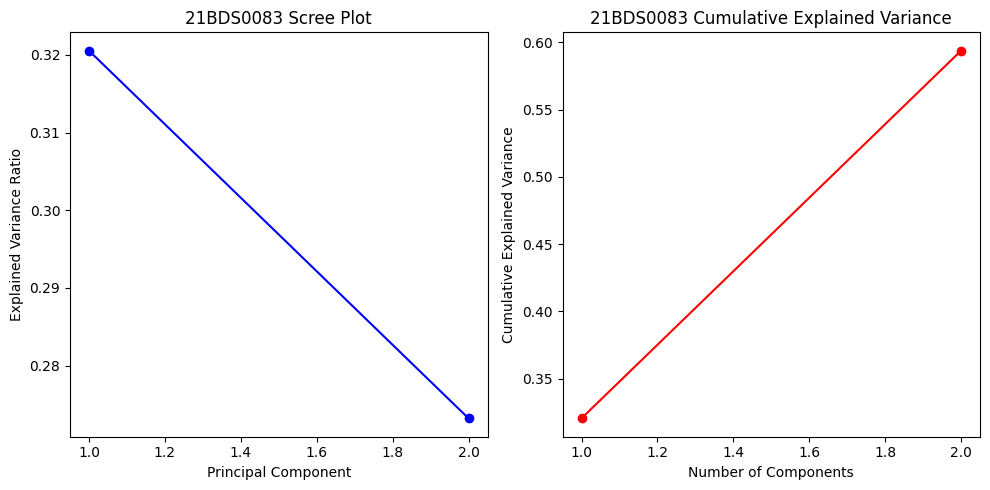

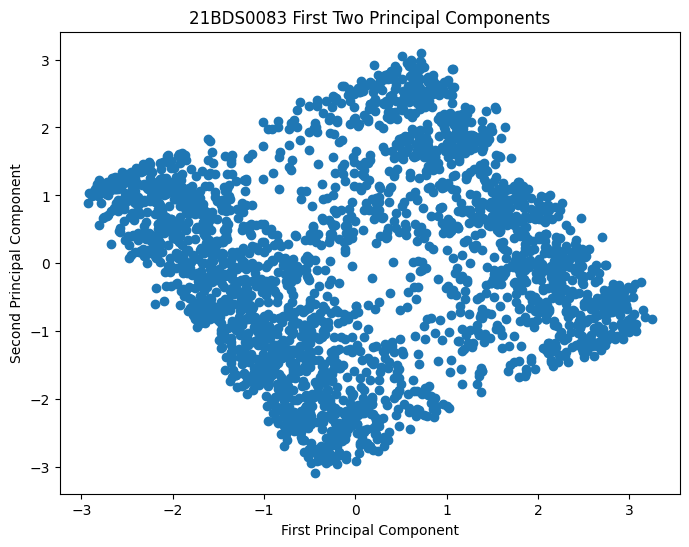


Performing SVD...


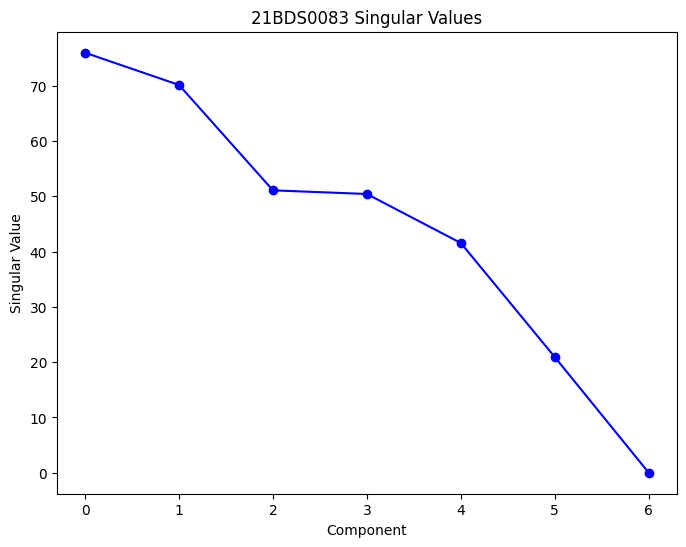


Performing Factor Analysis...


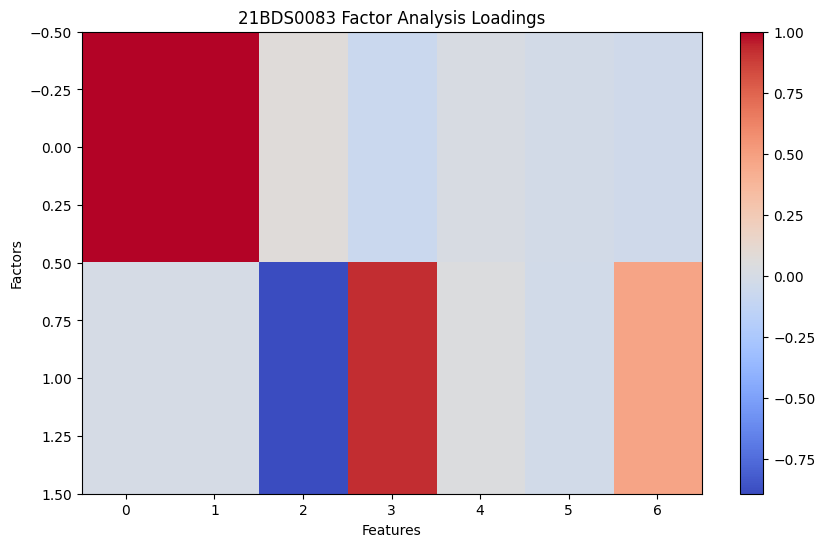


Estimating Intrinsic Dimensionality...
Estimated intrinsic dimensionality:
MLE (95% variance): 5
Elbow method: 2

Performing MDS...


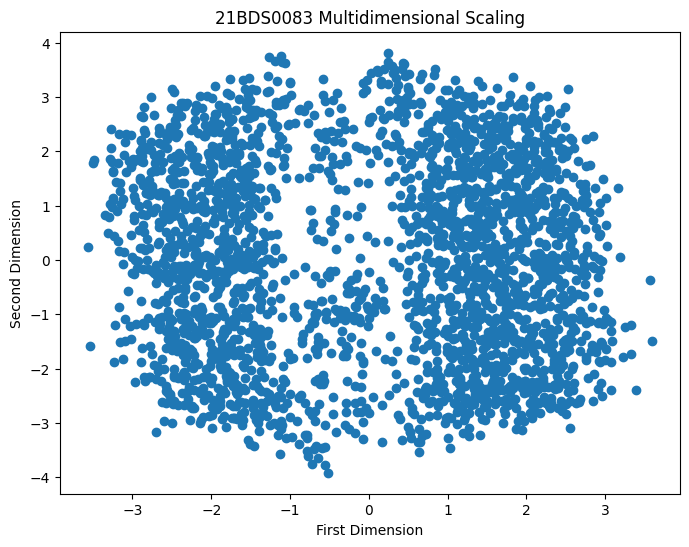


Performing Manifold Learning...


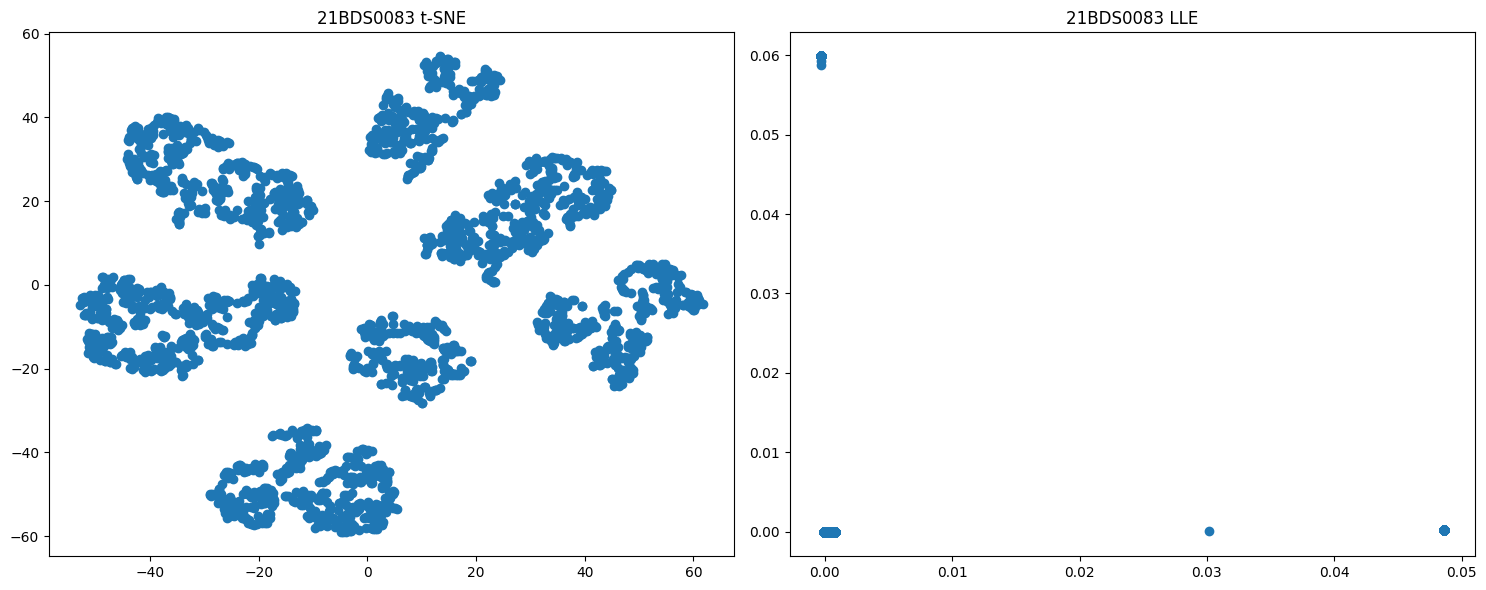


Performing SOM...


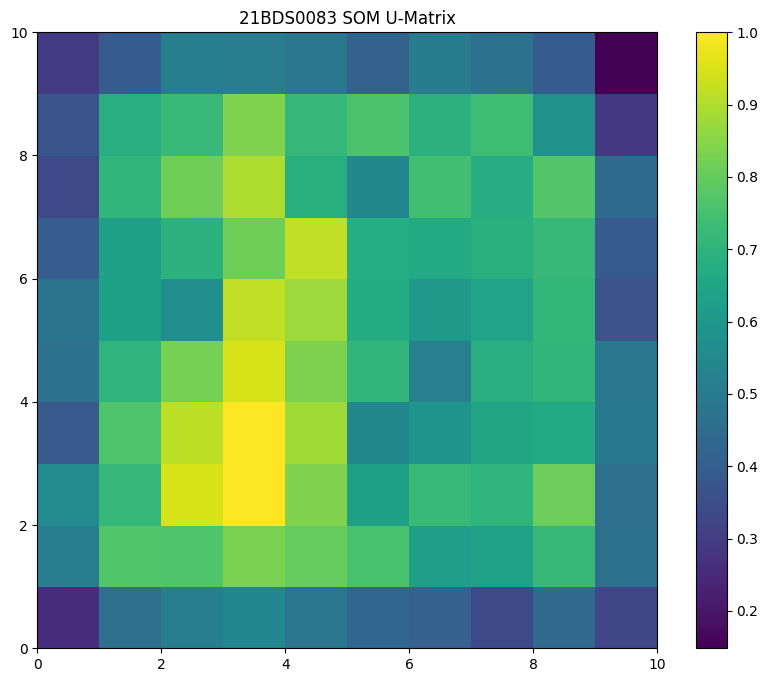


Results saved to dimensionality_reduction_results.csv


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import MDS, TSNE, LocallyLinearEmbedding
from scipy.linalg import svd
from minisom import MiniSom
import matplotlib.pyplot as plt
import seaborn as sns

class DimensionalityReduction:
    def __init__(self, data_path):
        """Initialize with path to transformed dataset"""
        self.df = pd.read_csv(data_path)
        self.X = None
        self.prepare_data()

    def prepare_data(self):
        """Prepare data for dimensionality reduction"""
        # Select numerical columns
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        X = self.df[numerical_cols].copy()

        # Handle missing values
        X = X.fillna(X.mean())

        # Scale the data
        scaler = StandardScaler()
        self.X = scaler.fit_transform(X)

        print("Data shape after preparation:", self.X.shape)

    def perform_pca(self, n_components=2):
        """Perform Principal Component Analysis"""
        # Initialize and fit PCA
        pca = PCA(n_components=n_components)
        pca_result = pca.fit_transform(self.X)

        # Calculate explained variance
        explained_variance = pca.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance)

        # Plot explained variance ratio
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-')
        plt.title('21BDS0083 Scree Plot')
        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance Ratio')

        # Plot cumulative explained variance
        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
        plt.title('21BDS0083 Cumulative Explained Variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.tight_layout()
        plt.show()

        # Plot first two principal components
        plt.figure(figsize=(8, 6))
        plt.scatter(pca_result[:, 0], pca_result[:, 1])
        plt.title('21BDS0083 First Two Principal Components')
        plt.xlabel('First Principal Component')
        plt.ylabel('Second Principal Component')
        plt.show()

        return pca_result, pca

    def perform_svd(self):
        """Perform Singular Value Decomposition"""
        U, S, Vt = svd(self.X, full_matrices=False)

        # Plot singular values
        plt.figure(figsize=(8, 6))
        plt.plot(S, 'bo-')
        plt.title('21BDS0083 Singular Values')
        plt.xlabel('Component')
        plt.ylabel('Singular Value')
        plt.show()

        # Calculate variance explained
        variance_explained = (S ** 2) / (S ** 2).sum()

        return U, S, Vt, variance_explained

    def perform_factor_analysis(self, n_factors=2):
        """Perform Factor Analysis"""
        fa = FactorAnalysis(n_components=n_factors, random_state=42)
        fa_result = fa.fit_transform(self.X)

        # Plot factor loadings
        plt.figure(figsize=(10, 6))
        plt.imshow(fa.components_, cmap='coolwarm', aspect='auto')
        plt.colorbar()
        plt.title('21BDS0083 Factor Analysis Loadings')
        plt.xlabel('Features')
        plt.ylabel('Factors')
        plt.show()

        return fa_result, fa

    def estimate_intrinsic_dimensionality(self):
        """Estimate intrinsic dimensionality using multiple methods"""
        # Maximum Likelihood Estimation
        pca = PCA().fit(self.X)
        cumsum = np.cumsum(pca.explained_variance_ratio_)
        d_mle = np.argmax(cumsum >= 0.95) + 1

        # Elbow method
        explained_var = pca.explained_variance_ratio_
        d_elbow = np.argmax(np.diff(np.diff(explained_var))) + 1

        print(f"Estimated intrinsic dimensionality:")
        print(f"MLE (95% variance): {d_mle}")
        print(f"Elbow method: {d_elbow}")

        return d_mle, d_elbow

    def perform_mds(self, n_components=2):
        """Perform Multidimensional Scaling"""
        mds = MDS(n_components=n_components, random_state=42)
        mds_result = mds.fit_transform(self.X)

        # Plot MDS results
        plt.figure(figsize=(8, 6))
        plt.scatter(mds_result[:, 0], mds_result[:, 1])
        plt.title('21BDS0083 Multidimensional Scaling')
        plt.xlabel('First Dimension')
        plt.ylabel('Second Dimension')
        plt.show()

        return mds_result

    def perform_manifold_learning(self):
        """Perform various manifold learning techniques"""
        # t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_result = tsne.fit_transform(self.X)

        # LLE
        lle = LocallyLinearEmbedding(n_components=2, random_state=42)
        lle_result = lle.fit_transform(self.X)

        # Plot results
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        ax1.scatter(tsne_result[:, 0], tsne_result[:, 1])
        ax1.set_title('21BDS0083 t-SNE')

        ax2.scatter(lle_result[:, 0], lle_result[:, 1])
        ax2.set_title('21BDS0083 LLE')

        plt.tight_layout()
        plt.show()

        return tsne_result, lle_result

    def perform_som(self, map_size=(10, 10)):
        """Perform Self-Organizing Map"""
        # Initialize and train SOM
        som = MiniSom(map_size[0], map_size[1], self.X.shape[1],
                     sigma=1.0, learning_rate=0.5, random_seed=42)
        som.train_random(self.X, 1000)

        # Get winner neurons for each sample
        winners = np.array([som.winner(x) for x in self.X])

        # Plot U-Matrix
        plt.figure(figsize=(10, 8))
        plt.pcolor(som.distance_map().T)
        plt.colorbar()
        plt.title('21BDS0083 SOM U-Matrix')
        plt.show()

        return som, winners

def main():
    # Initialize
    dr = DimensionalityReduction('SuicideChina_transformed.csv')

    # Perform linear methods
    print("\nPerforming PCA...")
    pca_result, pca = dr.perform_pca()

    print("\nPerforming SVD...")
    U, S, Vt, var_explained = dr.perform_svd()

    print("\nPerforming Factor Analysis...")
    fa_result, fa = dr.perform_factor_analysis()

    print("\nEstimating Intrinsic Dimensionality...")
    d_mle, d_elbow = dr.estimate_intrinsic_dimensionality()

    # Perform non-linear methods
    print("\nPerforming MDS...")
    mds_result = dr.perform_mds()

    print("\nPerforming Manifold Learning...")
    tsne_result, lle_result = dr.perform_manifold_learning()

    print("\nPerforming SOM...")
    som, winners = dr.perform_som()

    # Save results
    results = pd.DataFrame({
        'PCA_1': pca_result[:, 0],
        'PCA_2': pca_result[:, 1],
        'MDS_1': mds_result[:, 0],
        'MDS_2': mds_result[:, 1],
        'tSNE_1': tsne_result[:, 0],
        'tSNE_2': tsne_result[:, 1],
        'LLE_1': lle_result[:, 0],
        'LLE_2': lle_result[:, 1]
    })

    results.to_csv('dimensionality_reduction_results.csv', index=False)
    print("\nResults saved to dimensionality_reduction_results.csv")

    return results

if __name__ == "__main__":
    results = main()